In [12]:
import os
from fewshot_re_kit.data_loader import FewRelDataset
from fewshot_re_kit.sentence_encoder import GPT2SentenceEncoder,BERTSentenceEncoder
import json

In [13]:
max_length = 128
cat_entity_rep = False
encoder = GPT2SentenceEncoder('gpt2',max_length,cat_entity_rep=cat_entity_rep)
#encoder = BERTSentenceEncoder('bert-base-uncased',max_length,cat_entity_rep=cat_entity_rep)
N = 2
K = 1
Q = 1
name = 'train_wiki'


frds = FewRelDataset(name, encoder, N, K, Q, 0, './data')

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


dataset path: ./data/train_wiki.json


In [8]:
len(frds[0])


3

In [9]:
frds[0]

({'word': [tensor([50256,   464,  1743,  2647,  2008,   329,   262,  3496, 44119,   319,
            3267,  2608,   837,   262,  2647,  2008,  3033,   281,  5585,   416,
           50256, 13117, 50256,  1912,  4097, 50256,  7413,   921, 29739, 50256,
           42458,   355,   607,  4097,   764,     1,     1,     1,     1,     1,
               1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
               1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
               1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
               1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
               1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
               1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
               1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
               1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
               1,   

In [10]:
def dataset_sentences(ds, index):
    def sentence_from_list(sl):
        return ' '.join(sl)
    ds_entry = ds[index]
    tokenizer = ds.encoder.tokenizer
    support = ds_entry[0]
    print('Support:')
    masks = support['mask']
    for iy, y in enumerate(support['word']):
        ym = [y[i] for i in range(len(y)) if masks[iy][i] == 1]
        sent = tokenizer.convert_ids_to_tokens(ym)
        print(sentence_from_list(sent),'\n')
    query = ds_entry[1]
    print('Query:')
    masks = query['mask']
    for iy, y in enumerate(query['word']):
        ym = [y[i] for i in range(len(y)) if masks[iy][i] == 1]
        sent = tokenizer.convert_ids_to_tokens(ym)
        print(sentence_from_list(sent),'\n')

In [11]:
dataset_sentences(frds, 0)

Support:
<|endoftext|> The Ġchurch Ġis Ġa ĠColonial Ġrevival Ġstructure Ġwith Ġgranite Ġquo ins Ġ, Ġdesigned Ġby <|endoftext|> ĠJohn ĠRussell ĠPope <|endoftext|> Ġ, Ġarchitect Ġof Ġthe <|endoftext|> ĠJefferson ĠMemorial <|endoftext|> Ġ. 

<|endoftext|> Along side <|endoftext|> ĠFred rika ĠBre mer <|endoftext|> Ġ, ĠW Ã¤ g ner Ġis Ġoften Ġseen Ġas Ġthe Ġmost Ġimportant Ġand Ġinfluential <|endoftext|> Ġfeminist <|endoftext|> Ġpioneer Ġin ĠSweden Ġ. 

Query:
<|endoftext|> S yd ney Ġis Ġhome Ġto ĠAustralia Ġ' s Ġfirst Ġbuilding Ġby Ġrenowned ĠCanadian Ġarchitect <|endoftext|> ĠFrank ĠGeh ry <|endoftext|> Ġ, Ġthe <|endoftext|> ĠDr ĠChau ĠChak ĠWing ĠBuilding <|endoftext|> Ġ( Ġ2015 Ġ) Ġ, Ġbased Ġon Ġthe Ġdesign Ġof Ġa Ġtree Ġhouse Ġ. 

<|endoftext|> <|endoftext|> Jacob ĠApp el baum <|endoftext|> Ġ( Ġborn Ġ1 ĠApril Ġ1983 Ġ) Ġis Ġan ĠAmerican Ġindependent Ġjournalist Ġ, <|endoftext|> Ġcomputer Ġsecurity <|endoftext|> Ġresearcher Ġ, Ġartist Ġ, Ġand Ġhacker Ġ. 



### Investigate the json data's format
1. A dictionary of 64 relation classes, note: the relation classes are described in pid2name.json
2. Each relation class has 700 example sentences
3. Each sentence example has three parts

In [77]:
def json_summary(root, jname):
    path = os.path.join(root, jname + ".json")
    print(f'dataset path: {path}')
    if not os.path.exists(path):
        print(f"[ERROR] Data file does not exist! {path}")
    else:
        json_data = json.load(open(path))
    rel_path = os.path.join(root, 'pid2name.json')
    rel_data = json.load(open(rel_path))
    for c in list(json_data.keys()):
        #print(f'{c}: {rel_data[c][0]}')
        pass
    return json_data

In [87]:
json_data = json_summary('./data', 'val_nyt')

dataset path: ./data/val_nyt.json


In [88]:
total_count = 0
for rel in json_data:
    ex_count = len(json_data[rel])
    total_count += ex_count
    #print(f'{rel} {ex_count} {total_count}')
print(f'total: {total_count}')

total: 2500


In [89]:
rel_path = os.path.join('./data', 'pid2name.json')
rel_data = json.load(open(rel_path))

In [90]:
def fewrel_item(rel, index, json_data, rel_data):
    data = json_data[rel][index]
    rel_name = rel_data[rel][0]
    sent = ' '.join(data['tokens'])
    print(f'{rel}: {rel_name}')
    print(f'{sent}')
    print(data['h'])
    print(data['t'])  

In [91]:
fewrel_item('P101', 2, json_data, rel_data)

KeyError: 'P101'

In [92]:
tokenizer = frds.encoder.tokenizer
tl = tokenizer.convert_ids_to_tokens([ 6943,  1659,  1169,    82, 28079, 14150, 47436, 21542, 12583,  1525,
               3, 26437, 28478,    82,     2,    25,     1, 15783,  3464, 47698,
           25478,     1,    25,   261,  1507,  6747, 10333,   265, 24694,    17,
              11,     3,  9861,   292, 21175,     2,    11, 15039,    13, 50257])
print(f'token list length: {len(tl)}')

token list length: 40


### Sentence's token list length distribution

In [93]:
max_len = 0
token_len_list = []
for rel in json_data:
    for ex in json_data[rel]:
        tokens = ex['tokens']
        token_len_list.append(len(tokens))
        if len(tokens) > max_len:
            max_len = len(tokens)
    #print(f'{rel} {ex_count} {total_count}')
print(f'max_len: {max_len}')

max_len: 271


In [94]:
sum(token_len_list)/len(token_len_list)

37.202

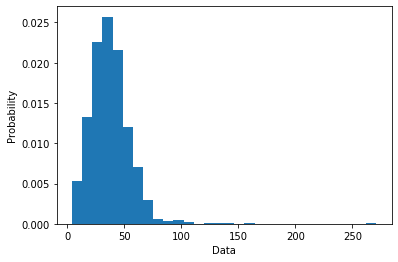

In [95]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(42)
x = np.random.normal(size=1000)
plt.hist(token_len_list, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');